<a href="https://colab.research.google.com/github/hadassah-olive/portfolio/blob/main/Time_series_forecasting_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#**TIME SERIES FORECASTING OF ACCIDENTAL DRUG RELATED DEATHS IN CONNECTICUT FOR THE NEXT FIVE YEARS**

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [48]:
df=pd.read_csv('/content/Accidental_Drug_Related_Deaths_2012-2024.csv')

In [49]:
df.head()

,Date,Date Type,Age,Sex,Race,Ethnicity,Residence City,Residence County,Residence State,Injury City,...,Xylazine,Gabapentin,Opiate NOS,Heroin/Morph/Codeine,Other Opioid,Any Opioid,Other,ResidenceCityGeo,InjuryCityGeo,DeathCityGeo
0,01/02/2023,Date of death,65.0,Male,White,"No, not Spanish/Hispanic/Latino",BRIDGEPORT,FAIRFIELD,CT,BRIDGEPORT,...,NaN,NaN,NaN,NaN,NaN,Y,NaN,"BRIDGEPORT, CT\n(41.179195, -73.189476)","BRIDGEPORT, CT\n(41.179195, -73.189476)","CT\n(41.57350273, -72.738305908)"
1,01/18/2023,Date of death,42.0,Male,White,"No, not Spanish/Hispanic/Latino",WATERBURY,NEW HAVEN,CT,FARMINGTON,...,NaN,NaN,NaN,NaN,NaN,Y,NaN,"WATERBURY, CT\n(41.5542609, -73.0430692)","FARMINGTON, CT\n(41.726536, -72.8250564)","CT\n(41.57350273, -72.738305908)"
2,01/26/2022,Date of death,34.0,Male,White,NaN,BROOKFIELD,FAIRFIELD,CT,BROOKFIELD,...,Y,NaN,NaN,Y,NaN,Y,NaN,"BROOKFIELD, CT\n(41.46736000000004, -73.398259...","BROOKFIELD, CT\n(41.46736000000004, -73.398259...","CT\n(41.57350273000003, -72.73830590799997)"
3,02/04/2023,Date of death,34.0,Male,White,NaN,NaN,NaN,NaN,NEW HAVEN,...,NaN,NaN,NaN,NaN,NaN,Y,NaN,"CT\n(41.57350273, -72.738305908)","NEW HAVEN, CT\n(41.3082517, -72.9241605)","CT\n(41.57350273, -72.738305908)"
4,02/18/2022,Date of death,43.0,Male,White,NaN,NORWICH,NEW LONDON,CT,NORWICH,...,NaN,NaN,NaN,NaN,NaN,Y,NaN,"NORWICH, CT\n(41.526760000000024, -72.07567999...","NORWICH, CT\n(41.526760000000024, -72.07567999...","CT\n(41.57350273000003, -72.73830590799997)"


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12963 entries, 0 to 12962
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           12963 non-null  object 
 1   Date Type                      12963 non-null  object 
 2   Age                            12961 non-null  float64
 3   Sex                            12954 non-null  object 
 4   Race                           12897 non-null  object 
 5   Ethnicity                      3435 non-null   object 
 6   Residence City                 12320 non-null  object 
 7   Residence County               11655 non-null  object 
 8   Residence State                10927 non-null  object 
 9   Injury City                    12706 non-null  object 
 10  Injury County                  9527 non-null   object 
 11  Injury State                   9849 non-null   object 
 12  Injury Place                   12573 non-null 

In [51]:
df.describe()

,Age
count,12961.000000
mean,44.354448
std,12.708543
min,13.000000
25%,34.000000
50%,44.000000
75%,55.000000
max,87.000000


In [52]:
df.isnull().sum()

,0
Date,0
Date Type,0
Age,2
Sex,9
Race,66
Ethnicity,9528
Residence City,643
Residence County,1308
Residence State,2036
Injury City,257


In [53]:
df.drop(columns=['Location','Location if Other','Death County','Death City', 'Injury County'    ,'Injury City', 'Injury Place', 'Residence City',
'Residence County','ResidenceCityGeo','InjuryCityGeo','DeathCityGeo'], inplace=True)

In [54]:
df.isnull().sum()

,0
Date,0
Date Type,0
Age,2
Sex,9
Race,66
Ethnicity,9528
Residence State,2036
Injury State,3114
Description of Injury,813
Death State,6090


In [55]:
drug_cols = ["Heroin","Heroin death certificate (DC)","Cocaine","Fentanyl","Fentanyl Analogue",
             "Oxycodone","Oxymorphone","Ethanol","Hydrocodone","Benzodiazepine",
             "Methadone","Meth/Amphetamine","Amphet","Tramad","Hydromorphone",
             "Morphine (Not Heroin)","Xylazine","Gabapentin","Opiate NOS",
             "Heroin/Morph/Codeine","Other Opioid","Any Opioid","Other"]
df[drug_cols] = df[drug_cols].fillna(0)

print(df.isnull().sum())

Date                                 0
Date Type                            0
Age                                  2
Sex                                  9
Race                                66
Ethnicity                         9528
Residence State                   2036
Injury State                      3114
Description of Injury              813
Death State                       6090
Cause of Death                       0
Manner of Death                      9
Other Significant Conditions     11614
Heroin                               0
Heroin death certificate (DC)        0
Cocaine                              0
Fentanyl                             0
Fentanyl Analogue                    0
Oxycodone                            0
Oxymorphone                          0
Ethanol                              0
Hydrocodone                          0
Benzodiazepine                       0
Methadone                            0
Meth/Amphetamine                     0
Amphet                   

In [56]:
columns_to_fill = ["Ethnicity","Residence State","Injury State","Description of Injury","Death State","Other Significant Conditions "]
df[columns_to_fill] = df[columns_to_fill].fillna("Unknown")

print(df.isnull().sum())

Date                              0
Date Type                         0
Age                               2
Sex                               9
Race                             66
Ethnicity                         0
Residence State                   0
Injury State                      0
Description of Injury             0
Death State                       0
Cause of Death                    0
Manner of Death                   9
Other Significant Conditions      0
Heroin                            0
Heroin death certificate (DC)     0
Cocaine                           0
Fentanyl                          0
Fentanyl Analogue                 0
Oxycodone                         0
Oxymorphone                       0
Ethanol                           0
Hydrocodone                       0
Benzodiazepine                    0
Methadone                         0
Meth/Amphetamine                  0
Amphet                            0
Tramad                            0
Hydromorphone               

In [57]:
print(df['Manner of Death'].unique())

['Accident' 'Acciddent' 'Pending' 'accident' nan 'ACCIDENT' 'Natural']


In [58]:
df["Manner of Death"] = (
    df["Manner of Death"]
    .str.lower()
    .str.strip()
    .replace({
        "acciddent": "accidental",
        "accident": "accidental",
        "pending": "unknown",
        "natural": "natural",
        "accident":"accidental",
        "acciddent":"accidental",
        "pending":"unknown",
        "natural":"natural",
        "accident":"accidental"
    })
    .fillna("unknown")
    .str.capitalize()
)

# Check unique values
print(df["Manner of Death"].unique())

['Accidental' 'Unknown' 'Natural']


In [59]:
# Fill with mode (most frequent value)
df["Age"] = df["Age"].fillna(df["Age"].mode()[0])
df["Race"] = df["Race"].fillna(df["Race"].mode()[0])

# Step 1: Find the mode of Sex
sex_mode = df["Sex"].mode()[0]
print("Mode of Sex:", sex_mode)

# Step 2: Replace 'Unknown' and 'X' with the mode
df["Sex"] = df["Sex"].replace(["Unknown", "X",'NaN'], sex_mode)


df.isnull().sum()


Mode of Sex: Male


,0
Date,0
Date Type,0
Age,0
Sex,9
Race,0
Ethnicity,0
Residence State,0
Injury State,0
Description of Injury,0
Death State,0


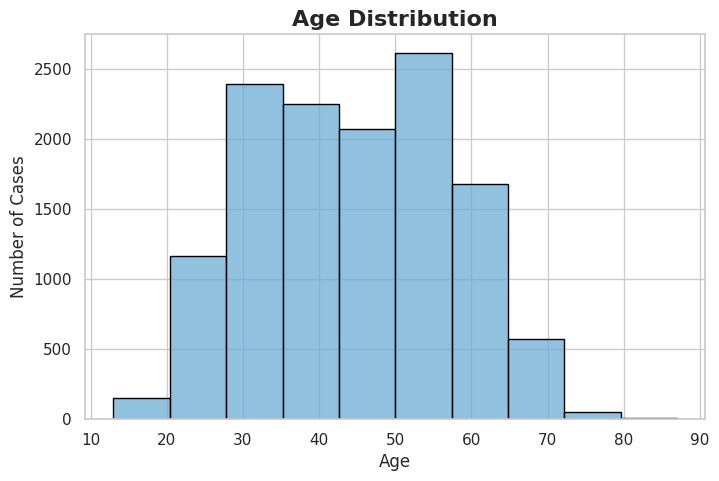

In [60]:

sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=10, color="#6baed6", edgecolor="black")

plt.title("Age Distribution", fontsize=16, fontweight="bold")
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Cases", fontsize=12)

plt.show()

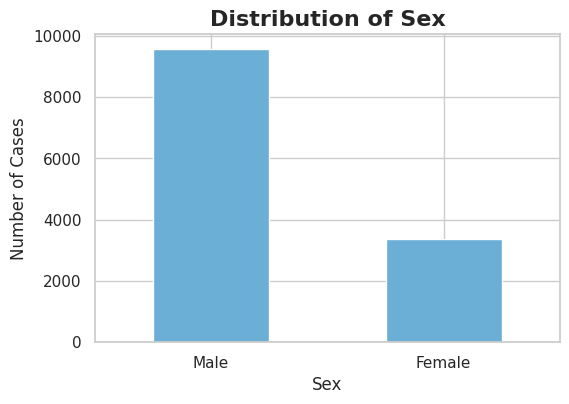

In [61]:
sns.set(style="whitegrid")
color = "#6baed6"

plt.figure(figsize=(6,4))
df["Sex"].value_counts().plot(
    kind="bar",
    color=color,
    edgecolor="white"
)

plt.title("Distribution of Sex", fontsize=16, fontweight="bold")
plt.xlabel("Sex", fontsize=12)
plt.ylabel("Number of Cases", fontsize=12)
plt.xticks(rotation=0)  # horizontal labels

plt.show()




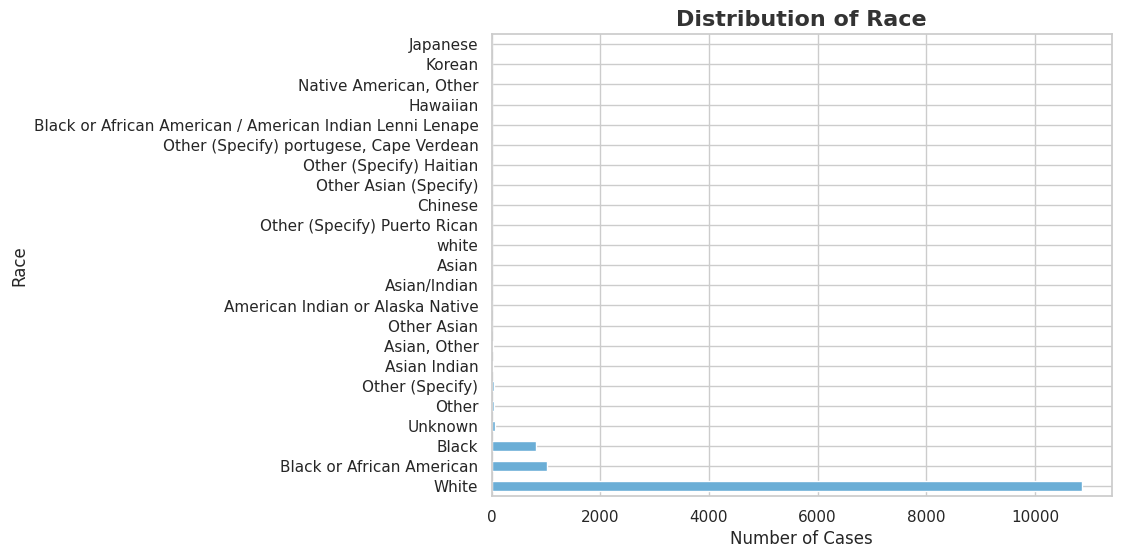

In [62]:
color = "#6baed6"

plt.figure(figsize=(8,6))
df["Race"].value_counts().plot(
    kind="barh",
    color=color,
    edgecolor="white"
)

plt.title("Distribution of Race", fontsize=16, fontweight="bold", color="#333333")
plt.xlabel("Number of Cases", fontsize=12)
plt.ylabel("Race", fontsize=12)

plt.show()


/tmp/ipython-input-2503255291.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace('Y', 1)


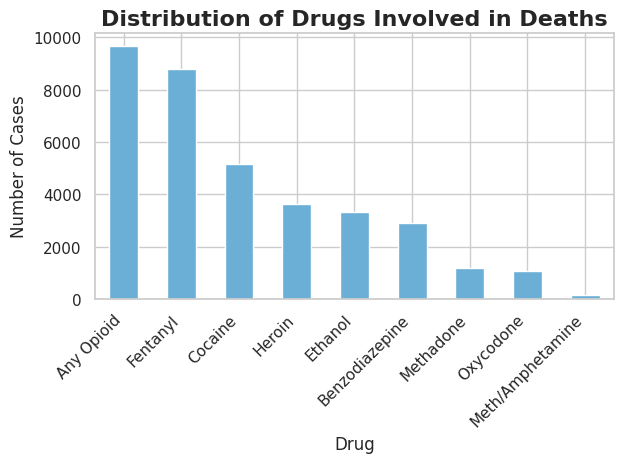

In [63]:
drug_cols = ["Heroin","Cocaine","Fentanyl","Meth/Amphetamine","Any Opioid",
             "Oxycodone","Methadone","Benzodiazepine","Ethanol"]

# Replace 'Y' with 1 in the selected drug columns
for col in drug_cols:
    df[col] = df[col].replace('Y', 1)

# Convert the drug columns to numeric, coercing errors
df[drug_cols] = df[drug_cols].apply(pd.to_numeric, errors='coerce')

# Fill any remaining NaNs that might result from coercion (though unlikely after filling NaNs with 0 earlier)
df[drug_cols] = df[drug_cols].fillna(0)

df[drug_cols].sum().sort_values(ascending=False).plot(kind="bar", color="#6baed6")
plt.title("Distribution of Drugs Involved in Deaths", fontsize=16, fontweight="bold")
plt.xlabel("Drug", fontsize=12)
plt.ylabel("Number of Cases", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Axes: >

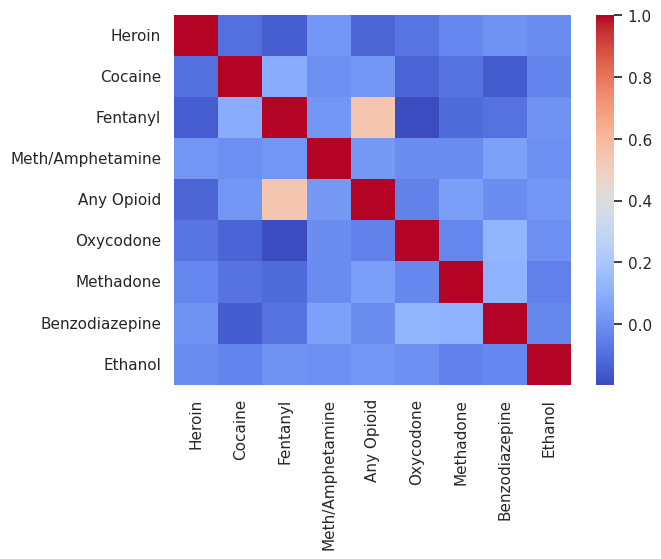

In [64]:
import seaborn as sns
sns.heatmap(df[drug_cols].corr(), cmap="coolwarm", annot=False)


/tmp/ipython-input-3487458913.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample("M", on="Date").size().plot()


<Axes: xlabel='Date'>

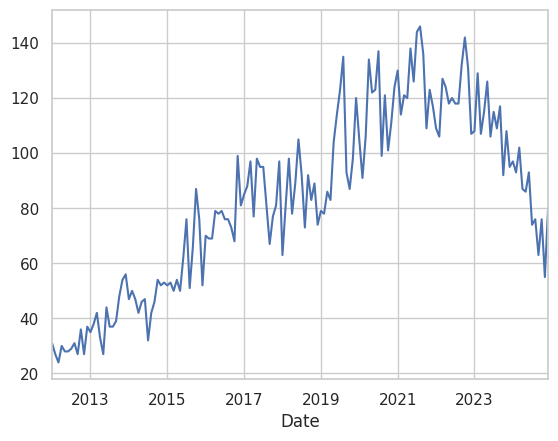

In [65]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df.resample("M", on="Date").size().plot()


/tmp/ipython-input-110006767.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample("M", on="Date")[drug].sum().plot(label=drug)
/tmp/ipython-input-110006767.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample("M", on="Date")[drug].sum().plot(label=drug)
/tmp/ipython-input-110006767.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample("M", on="Date")[drug].sum().plot(label=drug)
/tmp/ipython-input-110006767.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample("M", on="Date")[drug].sum().plot(label=drug)
/tmp/ipython-input-110006767.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample("M", on="Date")[drug].sum().plot(label=drug)


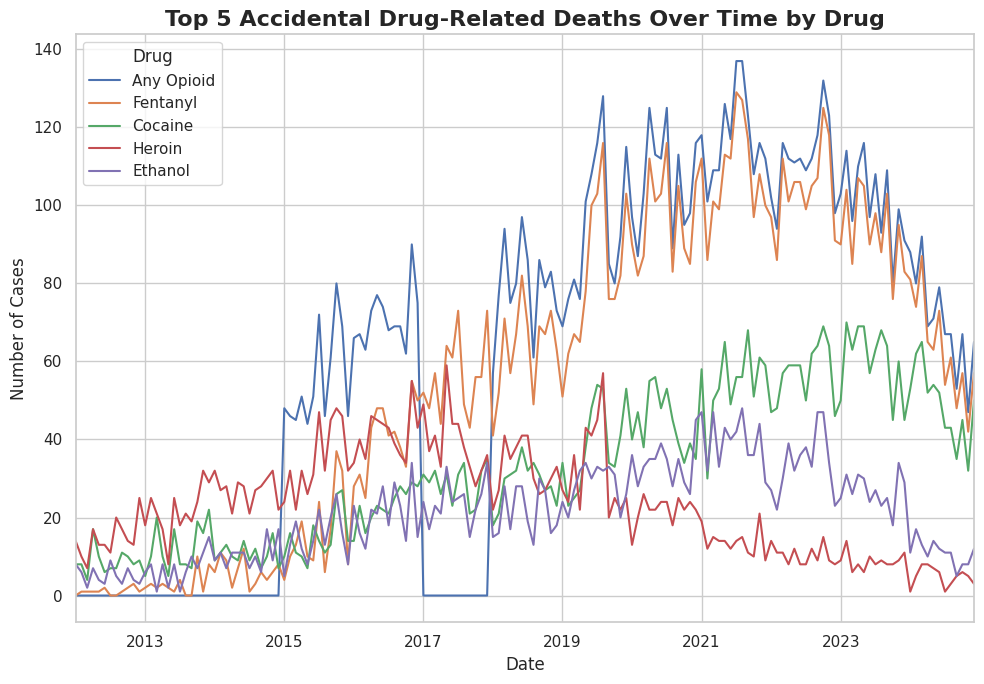

In [66]:
sns.set(style="whitegrid")

# Identify the top 5 most frequent drugs from the previous bar plot
drug_counts = df[drug_cols].sum().sort_values(ascending=False)
top_drugs = drug_counts.head(5).index.tolist()

plt.figure(figsize=(10, 7))

for drug in top_drugs:
    df.resample("M", on="Date")[drug].sum().plot(label=drug)

plt.title("Top 5 Accidental Drug-Related Deaths Over Time by Drug", fontsize=16, fontweight="bold")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Cases", fontsize=12)
plt.legend(title="Drug")
plt.grid(True)
plt.tight_layout()
plt.show()

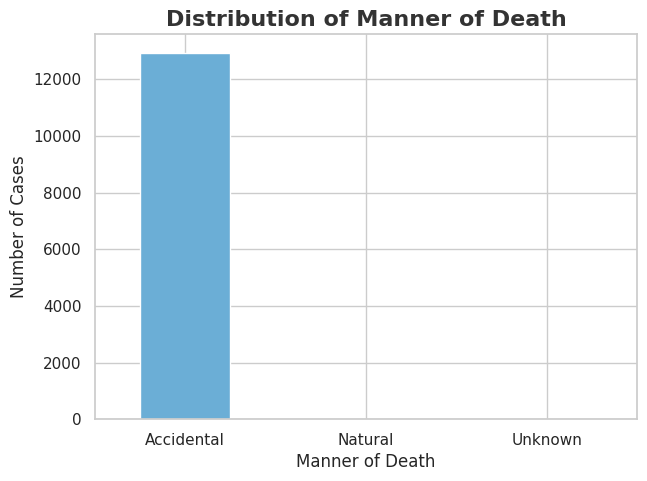

In [67]:
sns.set(style="whitegrid")

# Choose soft minimalist colors for the three categories
color = ["#6baed6"]

# Get counts in the order we want
counts = df["Manner of Death"].value_counts().reindex(["Accidental", "Natural", "Unknown"])

# Create the bar plot
plt.figure(figsize=(7,5))
counts.plot(
    kind="bar",
    color=color,
    edgecolor="white"
)

# Titles and labels
plt.title("Distribution of Manner of Death", fontsize=16, fontweight="bold", color="#333333")
plt.xlabel("Manner of Death", fontsize=12)
plt.ylabel("Number of Cases", fontsize=12)
plt.xticks(rotation=0)  # horizontal labels

plt.show()



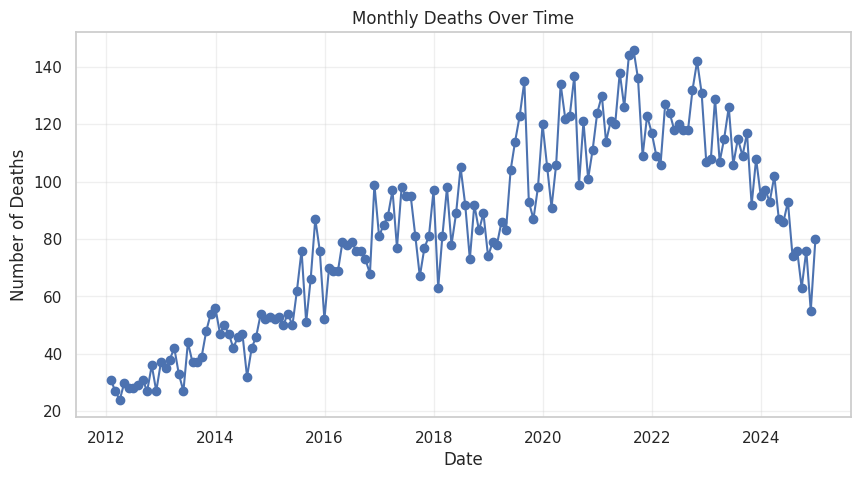

In [68]:
plt.figure(figsize=(10,5))
plt.plot(ts_monthly["Date"], ts_monthly["Deaths"], marker='o', linestyle='-')
plt.title("Monthly Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Deaths")
plt.grid(alpha=0.3)
plt.show()


In [69]:
# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
#Extract year from date
df["Year"] = df["Date"].dt.year
#Aggregate yearly death counts
yearly_deaths = df.groupby("Year").size().reset_index(name="DeathCount")


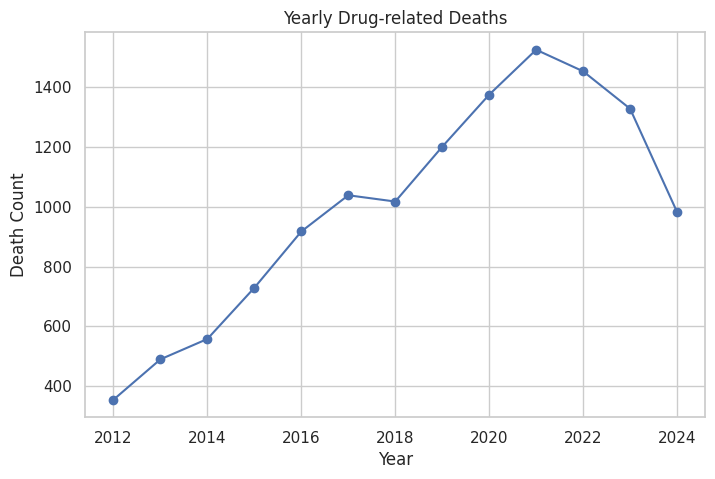

In [70]:
plt.figure(figsize=(8,5))
plt.plot(yearly_deaths["Year"], yearly_deaths["DeathCount"], marker='o')
plt.title("Yearly Drug-related Deaths")
plt.xlabel("Year")
plt.ylabel("Death Count")
plt.grid(True)
plt.show()


In [71]:
# Create lag features
yearly_deaths["Lag1"] = yearly_deaths["DeathCount"].shift(1)
yearly_deaths["Lag2"] = yearly_deaths["DeathCount"].shift(2)

# Drop rows with NaN (first 2 years)
yearly_deaths = yearly_deaths.dropna()


In [72]:
train = yearly_deaths[yearly_deaths["Year"] <= 2020]
test = yearly_deaths[yearly_deaths["Year"] > 2020]

X_train = train[["Lag1", "Lag2"]]
y_train = train["DeathCount"]

X_test = test[["Lag1", "Lag2"]]
y_test = test["DeathCount"]


In [73]:
!pip install --upgrade scikit-learn



In [74]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # RMSE manually
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    results[name] = {"RMSE": rmse, "MAE": mae}
    print(f"{name} -> RMSE: {rmse:.2f}, MAE: {mae:.2f}")


Random Forest -> RMSE: 215.93, MAE: 198.32
Gradient Boosting -> RMSE: 210.88, MAE: 186.49
Linear Regression -> RMSE: 307.88, MAE: 254.78
Support Vector Regressor -> RMSE: 369.97, MAE: 322.56


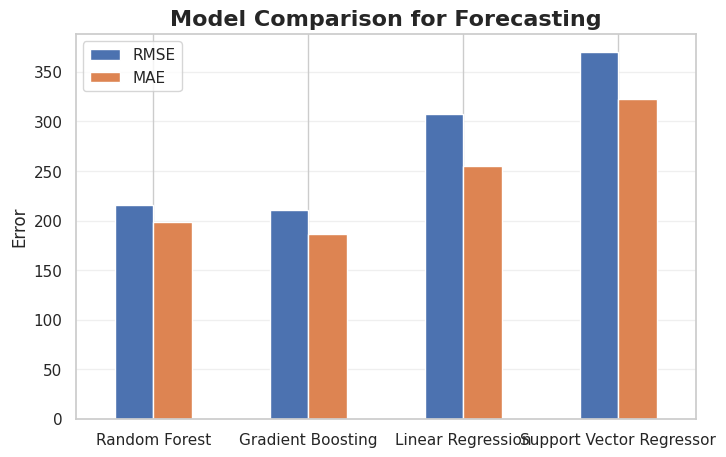

In [75]:
# Convert results to DataFrame
metrics_df = pd.DataFrame(results).T

# Plot RMSE and MAE side by side
metrics_df.plot(kind="bar", figsize=(8,5))
plt.title("Model Comparison for Forecasting", fontsize=16, fontweight="bold")
plt.ylabel("Error")
plt.xticks(rotation=0)
plt.grid(axis="y", alpha=0.3)
plt.show()


In [76]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting with same parameters
best_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)


,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [77]:
# Last two years from the dataset
lag1 = yearly_deaths["DeathCount"].iloc[-1]
lag2 = yearly_deaths["DeathCount"].iloc[-2]

# Future years
future_years = [yearly_deaths["Year"].max() + i for i in range(1, 6)]
predictions = []


In [78]:
for _ in future_years:
    pred = best_model.predict([[lag1, lag2]])[0]  # predict next year
    predictions.append(pred)

    # Update lags for next iteration
    lag2 = lag1
    lag1 = pred


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.w

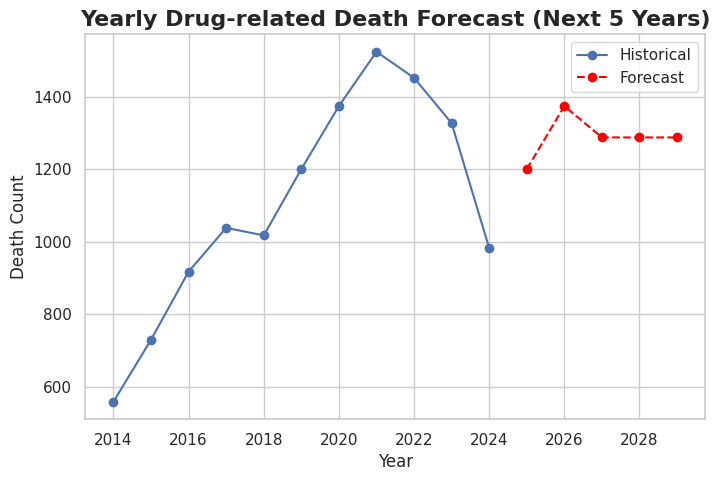

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(yearly_deaths["Year"], yearly_deaths["DeathCount"], marker='o', label="Historical")
plt.plot(future_years, predictions, marker='o', linestyle="--", color="red", label="Forecast")
plt.title("Yearly Drug-related Death Forecast (Next 5 Years)", fontsize=16, fontweight="bold")
plt.xlabel("Year")
plt.ylabel("Death Count")
plt.legend()
plt.grid(True)
plt.show()


Interpretation:

The forecasted deaths for 2025 to 2029 are generated using a recursive Gradient Boosting model. The prediction for 2025 shows a slight rise compared to 2024, followed by a peak in 2026. After that, the forecast stabilizes around a slightly lower level, suggesting that the model expects death counts to plateau rather than continue rising sharply.
Overall, the plot indicates that while historical deaths increased significantly, the forecast predicts a moderate rise followed by stabilization, suggesting a potential slowing in the upward trend of drug-related deaths. The use of dashed red lines and crosses clearly differentiates the forecast from historical data, making the trends easy to compare.


**SUMMARY**

I used Accidental Drug Related Deaths in Connecticut dataset containing data from 2012 to 2024.
As it was real time data I began by cleaning the data by dropping empty or irrelevant columns and retaining the columns that would be necessary for my analysis. I replaced a few missing values with mode, for instance, in age and sex columns as the missingness of values very minimal. I further did a few more cleaning steps to make my data ready for analysis.
I used the cleaned data to plot a few graph to analyse trends across various variables.
I then continued my analysis by setting up a GradientBoostingRegressor using scikit-learn. I chose 100 estimators and set a random state to make sure my results would be reproducible. Once the model was initialized, I trained it on my historical yearly drug-related death data, using the death counts from the last two years as input features.
To forecast future trends, I prepared for recursive predictions. I extracted the death counts from the last two years in my dataset to use as initial lag values. Then, I created a list of the next five years for which I wanted to make predictions. Using a loop, I predicted each year’s death count based on the most recent two lag values. After each prediction, I added it to a list of future predictions and updated the lags so that the model could use the new prediction as input for the following year. This recursive approach allowed me to extend the forecast year by year.
Finally, I visualized my results using Matplotlib. I plotted the historical death counts with circular markers and overlaid the five-year forecast using red crosses connected with dashed lines. The resulting plot clearly showed the historical trend and my model’s forecast for the next five years, providing a straightforward visual of potential future outcomes.

